<a href="https://colab.research.google.com/github/edisonc57/neftepromyslovyye-zhidkosti-s-ispol-zovaniyem-Python/blob/main/%D0%9E%D0%B1%D1%8A%D0%B5%D0%BC%D0%BD%D1%8B%D0%B9_%D0%BA%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D0%B3%D0%B0%D0%B7%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

la relación lineal entre la variable real y la ajustada es de   0.986693344873682


Text(0.5, 1.0, 'p vs Bg')

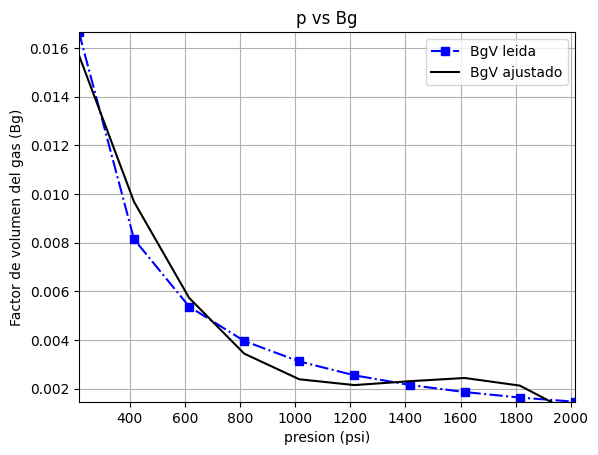

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import CubicSpline

datos=  pd.read_excel('/content/drive/MyDrive/Colab Notebooks/datos_01.xlsx', sheet_name= "Hoja1")
press= np.array (datos["Presión [psia]"])
BgV= np.array(datos["Bg [RB/scf]"])
Mugv= np.array(datos["Mug [cp]"])
#print(press)
#print(BgV)
#print(Mugv)

def fit_function(x, a, b, c, d):
  return a*x**3+b*x**2+c*x+d

p_adjust, p_cov= curve_fit(fit_function, press, BgV)
#print(p_adjust)

R2= np.corrcoef(BgV, fit_function(press,*p_adjust))[0,1]
print('la relación lineal entre la variable real y la ajustada es de  ',  R2)

plt.figure("Datos BgV")
plt.plot(press, BgV, '-.bs', label= 'BgV leida')
plt.plot(press, fit_function(press,*p_adjust), '-k', label= 'BgV ajustado' )
plt.xlim((np.min(press), np.max(press)))
plt.ylim((np.min(BgV),np.max(BgV)))
plt.xlabel('presion (psi)')
plt.ylabel('Factor de volumen del gas (Bg)')
plt.legend(loc=0)
plt.grid()
plt.title('p vs Bg')

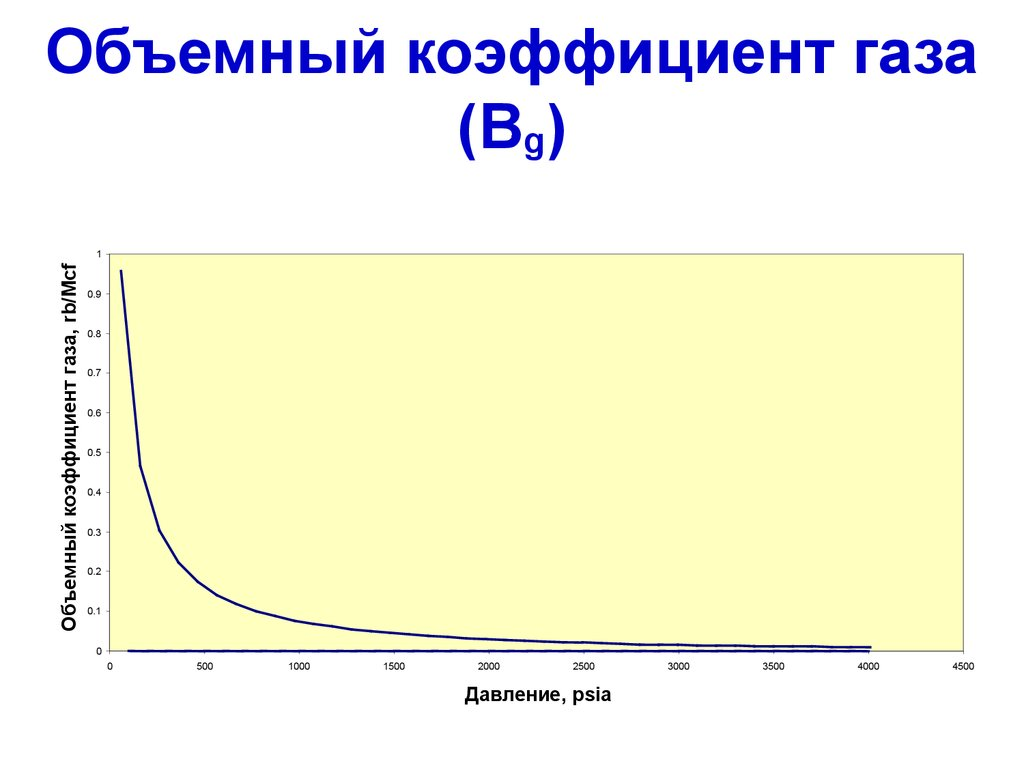

Como es una función cúbica por eso tiene una forma de "S", y claramente no se ajusta 0.98

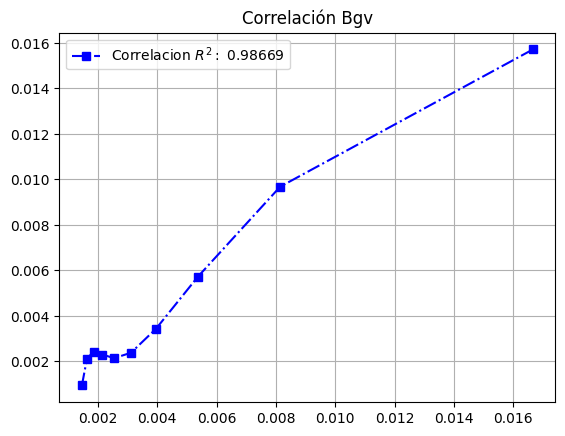

In [46]:
plt.figure ("Corr")
plt.title("Correlación Bgv")
plt.plot(BgV, fit_function(press, *p_adjust), '-.bs', label='Correlacion $R^{2}:$ %s'% str(round(R2,5)))
plt.legend(loc=0)
plt.grid()

No siempre un coeficiente de 0.98 es una buena correlacion, vamos a probar con un ajuste cuadrático

la relación lineal entre la variable real y la ajustada es de   0.9468619331067337


Text(0.5, 1.0, 'p vs Bg')

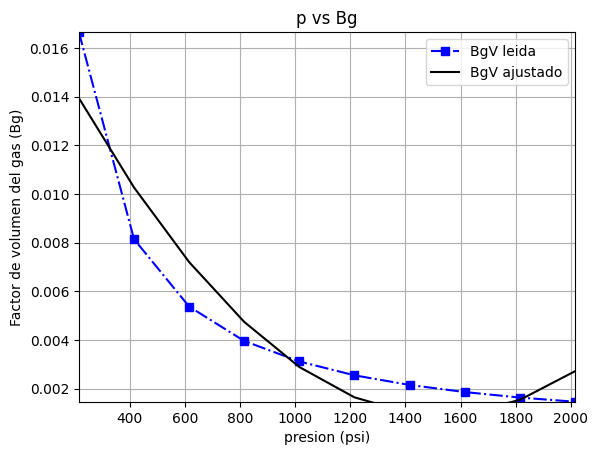

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import CubicSpline

datos=  pd.read_excel('/content/drive/MyDrive/Colab Notebooks/datos_01.xlsx', sheet_name= "Hoja1")
press= np.array (datos["Presión [psia]"])
BgV= np.array(datos["Bg [RB/scf]"])
Mugv= np.array(datos["Mug [cp]"])
#print(press)
#print(BgV)
#print(Mugv)

def fit_function2 (x,a,b,c):
    return a*x**2+b*x+c

p_adjust, p_cov= curve_fit(fit_function2, press, BgV)
#print(p_adjust)

R2= np.corrcoef(BgV, fit_function2(press,*p_adjust))[0,1]
print('la relación lineal entre la variable real y la ajustada es de  ',  R2)

plt.figure("Datos BgV")
plt.plot(press, BgV, '-.bs', label= 'BgV leida')
plt.plot(press, fit_function2(press,*p_adjust), '-k', label= 'BgV ajustado' )
plt.xlim((np.min(press), np.max(press)))
plt.ylim((np.min(BgV),np.max(BgV)))
plt.xlabel('presion (psi)')
plt.ylabel('Factor de volumen del gas (Bg)')
plt.legend(loc=0)
plt.grid()
plt.title('p vs Bg')

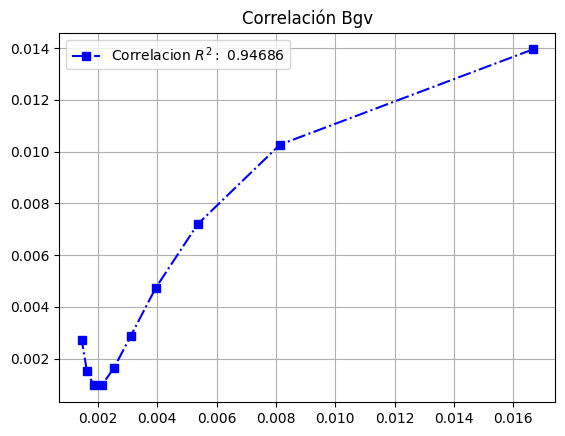

In [4]:
plt.figure ("Corr")
plt.title("Correlación Bgv")
plt.plot(BgV, fit_function2(press, *p_adjust), '-.bs', label='Correlacion $R^{2}:$ %s'% str(round(R2,5)))
plt.legend(loc=0)
plt.grid()

como vemos la relación no queda ajustada yua que el valor es 0.94, vamos a utilizar potencia

la relación lineal entre la variable real y la ajustada es de   0.9999897880277788


/usr/local/lib/python3.9/dist-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Text(0.5, 1.0, 'p vs Bg')

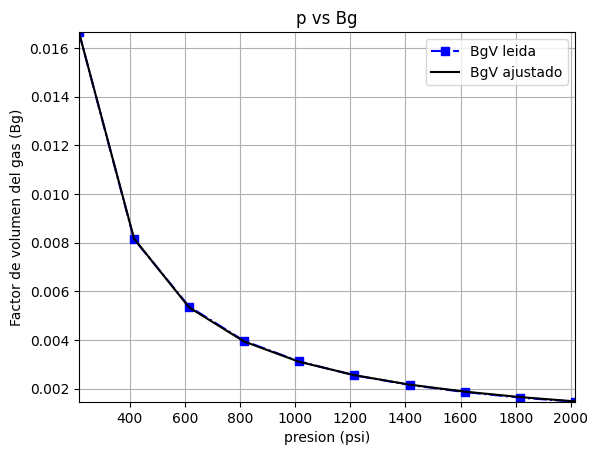

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import CubicSpline

datos=  pd.read_excel('/content/drive/MyDrive/Colab Notebooks/datos_01.xlsx', sheet_name= "Hoja1")
press= np.array (datos["Presión [psia]"])
BgV= np.array(datos["Bg [RB/scf]"])
Mugv= np.array(datos["Mug [cp]"])
#print(press)
#print(BgV)
#print(Mugv)

def fit_function3 (x,a,b,c):
    return a*x**b

p_adjust, p_cov= curve_fit(fit_function3, press, BgV)
#print(p_adjust)

R2= np.corrcoef(BgV, fit_function3(press,*p_adjust))[0,1]
print('la relación lineal entre la variable real y la ajustada es de  ',  R2)

plt.figure("Datos BgV")
plt.plot(press, BgV, '-.bs', label= 'BgV leida')
plt.plot(press, fit_function3(press,*p_adjust), '-k', label= 'BgV ajustado' )
plt.xlim((np.min(press), np.max(press)))
plt.ylim((np.min(BgV),np.max(BgV)))
plt.xlabel('presion (psi)')
plt.ylabel('Factor de volumen del gas (Bg)')
plt.legend(loc=0)
plt.grid()
plt.title('p vs Bg')

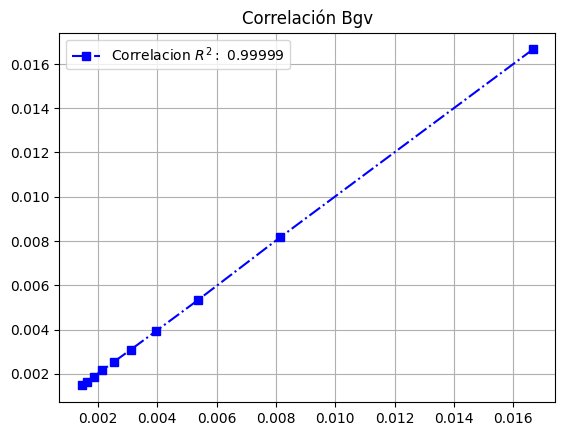

In [6]:
plt.figure ("Corr")
plt.title("Correlación Bgv")
plt.plot(BgV, fit_function3(press, *p_adjust), '-.bs', label='Correlacion $R^{2}:$ %s'% str(round(R2,5)))
plt.legend(loc=0)
plt.grid()